# San Francisco Airport
* Clustering
* Hava yolları uçuş sayısına ve yolcu sayısına göre kümeleme yapılacak

In [2]:
import pandas as pd

import warnings
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


### Havayollarına ait özellikleri çıkaralım

In [6]:
# Uçuş Sayısı
nFlights = df["Operating Airline"].value_counts()
nFlights.sort_index(inplace=True)
nFlights

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      8
ATA Airlines                                 44
Aer Lingus                                  152
Aeromexico                                  234
Air Berlin                                   60
                                           ... 
WOW Air                                      56
WestJet Airlines                            135
World Airways                                 3
XL Airways France                            51
Xtra Airways                                  2
Name: count, Length: 89, dtype: int64

In [9]:
# Yurtiçi Uçuş Sayısı
nDomestic = df[df['GEO Summary'] == 'Domestic'].groupby('Operating Airline').size()
nDomestic.sort_index(inplace=True)
nDomestic

Operating Airline
ATA Airlines                         41
AirTran Airways                     226
Alaska Airlines                     426
Allegiant Air                        16
American Airlines                   380
American Eagle Airlines             106
Ameriflight                          22
Atlantic Southeast Airlines          22
Atlas Air, Inc                        2
Boeing Company                        1
Compass Airlines                    205
Delta Air Lines                     345
ExpressJet Airlines                  32
Frontier Airlines                   314
Hawaiian Airlines                   312
Horizon Air                         256
Independence Air                     10
JetBlue Airways                     305
Mesa Airlines                       118
Mesaba Airlines                      44
Miami Air International              15
Midwest Airlines                    116
Northwest Airlines                  128
Republic Airlines                    24
Servisair             

In [10]:
# Yurtdışı Uçuş Sayısı
nInternational = df[df['GEO Summary'] == 'International'].groupby('Operating Airline').size()
nInternational.sort_index(inplace=True)
nInternational

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      8
ATA Airlines                                  3
Aer Lingus                                  152
Aeromexico                                  234
Air Berlin                                   60
                                           ... 
Volaris Airlines                             48
WOW Air                                      56
WestJet Airlines                            135
World Airways                                 2
XL Airways France                            51
Length: 65, dtype: int64

In [7]:
# Toplam Yolcu Sayısı
nPassengers = df.groupby("Operating Airline").sum()["Passenger Count"]
nPassengers.sort_index(inplace=True)
nPassengers

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      15585
ATA Airlines                                 384764
Aer Lingus                                   777691
Aeromexico                                  1672946
Air Berlin                                   235155
                                             ...   
WOW Air                                      295168
WestJet Airlines                             799801
World Airways                                   785
XL Airways France                            118961
Xtra Airways                                    146
Name: Passenger Count, Length: 89, dtype: int64

In [11]:
df["Activity Type Code"].value_counts()

Activity Type Code
Enplaned          8930
Deplaned          8909
Thru / Transit    1046
Name: count, dtype: int64

In [12]:
df.to_excel("uçuş.xlsx")

In [13]:
# Gelen Yolcu Sayısı
nDeplaned = df[df['Activity Type Code'] == 'Deplaned'].groupby('Operating Airline').sum()["Passenger Count"]
nDeplaned.sort_index(inplace=True)
nDeplaned

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      7530
ATA Airlines                                168621
Aer Lingus                                  390044
Aeromexico                                  828202
Air Berlin                                  121511
                                             ...  
WOW Air                                     146052
WestJet Airlines                            397275
World Airways                                  255
XL Airways France                            60865
Xtra Airways                                    73
Name: Passenger Count, Length: 89, dtype: int64

In [14]:
# Giden Yolcu Sayısı
nEnplaned = df[df['Activity Type Code'] == 'Enplaned'].groupby('Operating Airline').sum()["Passenger Count"]
nEnplaned.sort_index(inplace=True)
nEnplaned

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      8055
ATA Airlines                                175794
Aer Lingus                                  387647
Aeromexico                                  844744
Air Berlin                                  113644
                                             ...  
WOW Air                                     149116
WestJet Airlines                            402389
World Airways                                  530
XL Airways France                            57570
Xtra Airways                                    73
Name: Passenger Count, Length: 87, dtype: int64

In [16]:
# Aktarma Yolcu Sayısı
nTransit = df[df['Activity Type Code'] == 'Thru / Transit'].groupby('Operating Airline').sum()["Passenger Count"]
nTransit.sort_index(inplace=True)
nTransit

Operating Airline
ATA Airlines                         40349
Alaska Airlines                     235093
Ameriflight                              8
Atlas Air, Inc                           3
BelAir Airlines                        278
Compass Airlines                       149
Delta Air Lines                       7426
French Bee                            5628
Hong Kong Airlines Limited             611
Japan Airlines                         284
Northwest Airlines                   23101
SkyWest Airlines                       223
Southwest Airlines                   12820
Swissport USA                           93
United Airlines                     101316
United Airlines - Pre 07/01/2013    969406
WestJet Airlines                       137
XL Airways France                      526
Name: Passenger Count, dtype: int64

In [30]:
df2=pd.DataFrame({"Uçuş Sayısı":nFlights, "Yurtiçi Uçuş Sayısı":nDomestic, "Yurtdışı Uçuş Sayısı":nInternational, 
                         "Toplam Yolcu Sayısı":nPassengers, "Gelen Yolcu Sayısı":nDeplaned, 
                  "Giden Yolcu Sayısı":nEnplaned, "Aktarma Yolcu Sayısı":nTransit})
df2

,Uçuş Sayısı,Yurtiçi Uçuş Sayısı,Yurtdışı Uçuş Sayısı,Toplam Yolcu Sayısı,Gelen Yolcu Sayısı,Giden Yolcu Sayısı,Aktarma Yolcu Sayısı
Operating Airline,,,,,,,
ABC Aerolineas S.A. de C.V. dba Interjet,8,NaN,8.0,15585,7530,8055.0,NaN
ATA Airlines,44,41.0,3.0,384764,168621,175794.0,40349.0
Aer Lingus,152,NaN,152.0,777691,390044,387647.0,NaN
Aeromexico,234,NaN,234.0,1672946,828202,844744.0,NaN
Air Berlin,60,NaN,60.0,235155,121511,113644.0,NaN
...,...,...,...,...,...,...,...
WOW Air,56,NaN,56.0,295168,146052,149116.0,NaN
WestJet Airlines,135,NaN,135.0,799801,397275,402389.0,137.0
World Airways,3,1.0,2.0,785,255,530.0,NaN


In [31]:
df2['Hava Alanı'] = df2.index
df2.reset_index(drop=True, inplace=True)
df2=df2.fillna(0)

In [32]:
df2.head()

,Uçuş Sayısı,Yurtiçi Uçuş Sayısı,Yurtdışı Uçuş Sayısı,Toplam Yolcu Sayısı,Gelen Yolcu Sayısı,Giden Yolcu Sayısı,Aktarma Yolcu Sayısı,Hava Alanı
0,8,0.0,8.0,15585,7530,8055.0,0.0,ABC Aerolineas S.A. de C.V. dba Interjet
1,44,41.0,3.0,384764,168621,175794.0,40349.0,ATA Airlines
2,152,0.0,152.0,777691,390044,387647.0,0.0,Aer Lingus
3,234,0.0,234.0,1672946,828202,844744.0,0.0,Aeromexico
4,60,0.0,60.0,235155,121511,113644.0,0.0,Air Berlin


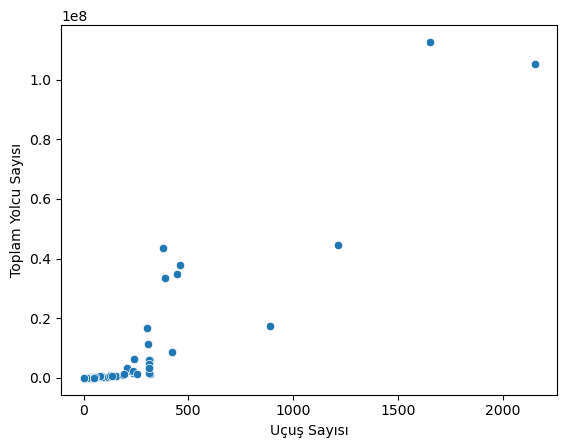

In [34]:
import seaborn as sns
sns.scatterplot(x=df2['Uçuş Sayısı'], y=df2['Toplam Yolcu Sayısı']);

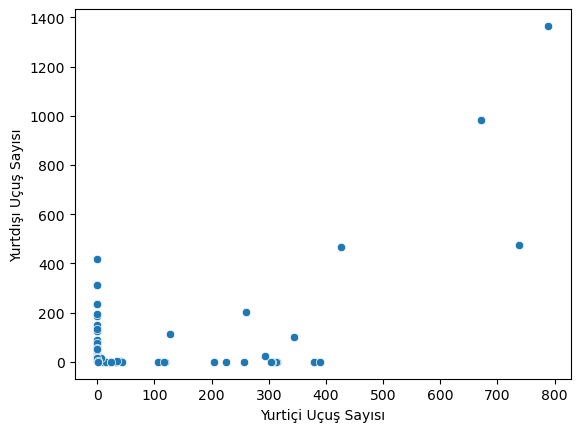

In [36]:
sns.scatterplot(x=df2['Yurtiçi Uçuş Sayısı'], y=df2['Yurtdışı Uçuş Sayısı']);

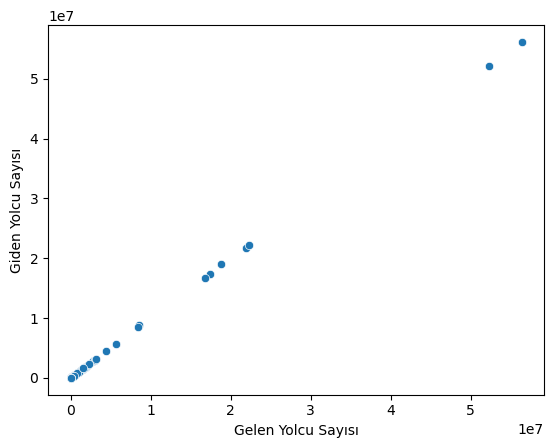

In [37]:
sns.scatterplot(x=df2['Gelen Yolcu Sayısı'], y=df2['Giden Yolcu Sayısı']);

## Modelleme

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

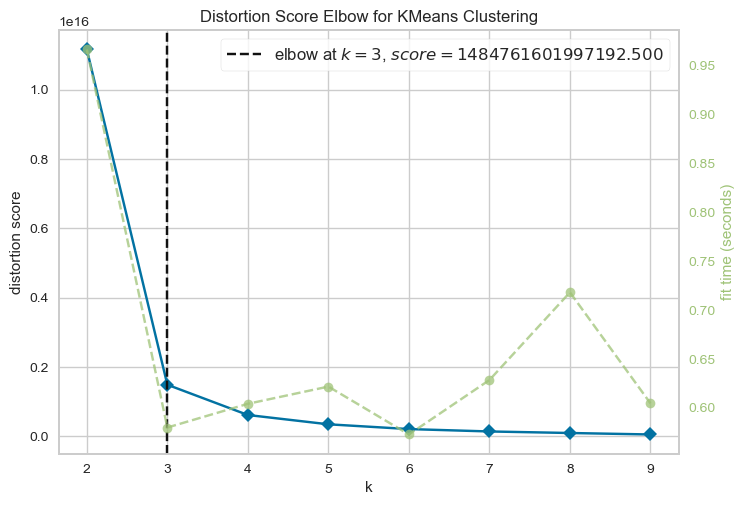

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
x = df2.drop("Hava Alanı", axis=1)
y = df2[["Hava Alanı"]]

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(x) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [40]:
df2.columns

Index(['Uçuş Sayısı', 'Yurtiçi Uçuş Sayısı', 'Yurtdışı Uçuş Sayısı',
       'Toplam Yolcu Sayısı', 'Gelen Yolcu Sayısı', 'Giden Yolcu Sayısı',
       'Aktarma Yolcu Sayısı', 'Hava Alanı'],
      dtype='object')

#### Uçuş sayısına göre kümeleme

In [41]:
dfc=df2[['Yurtiçi Uçuş Sayısı', 'Yurtdışı Uçuş Sayısı']]

In [42]:
model=KMeans(3)

In [43]:
model=model.fit(dfc)

In [44]:
pred=model.predict(dfc)

In [45]:
dfc["Cluster"]=pred

In [46]:
dfc.head()

,Yurtiçi Uçuş Sayısı,Yurtdışı Uçuş Sayısı,Cluster
0,0.0,8.0,0
1,41.0,3.0,0
2,0.0,152.0,0
3,0.0,234.0,1
4,0.0,60.0,0


In [47]:
silhouette_score(dfc, pred)

0.5966162781475745

In [48]:
import matplotlib.pyplot as plt
import numpy as np

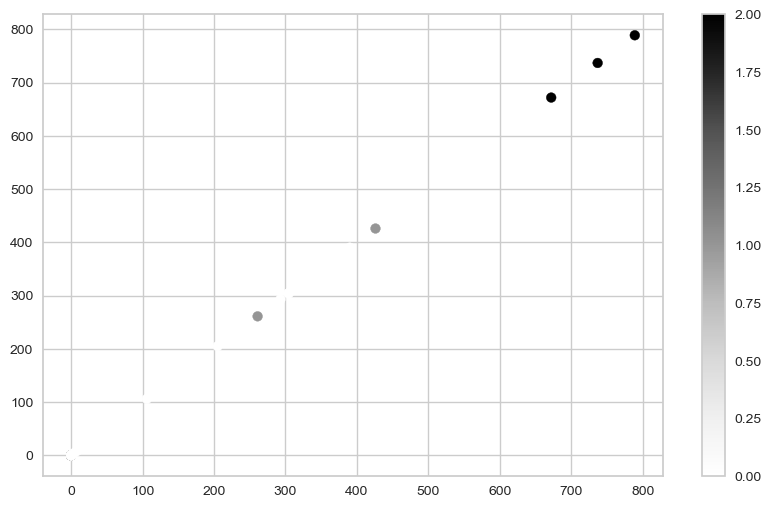

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(dfc['Yurtiçi Uçuş Sayısı'], dfc['Yurtiçi Uçuş Sayısı'], c=pred)
plt.colorbar();

#### Yolcu sayısına göre kümeleme

In [50]:
dfc=df2[['Gelen Yolcu Sayısı', 'Giden Yolcu Sayısı', 'Aktarma Yolcu Sayısı']]

In [51]:
model=KMeans(3)
model=model.fit(dfc)
pred=model.predict(dfc)
dfc["Cluster"]=pred
silhouette_score(dfc, pred)

0.9123620867746831

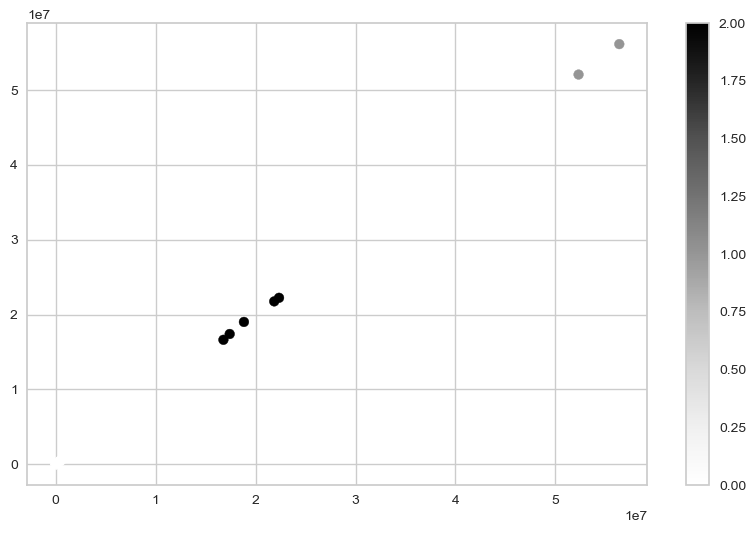

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(dfc['Gelen Yolcu Sayısı'], dfc['Giden Yolcu Sayısı'], c=pred)
plt.colorbar();

### Hierarchical Clustering Model

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage 

In [56]:
data=linkage(x, method="ward", metric="euclidean")

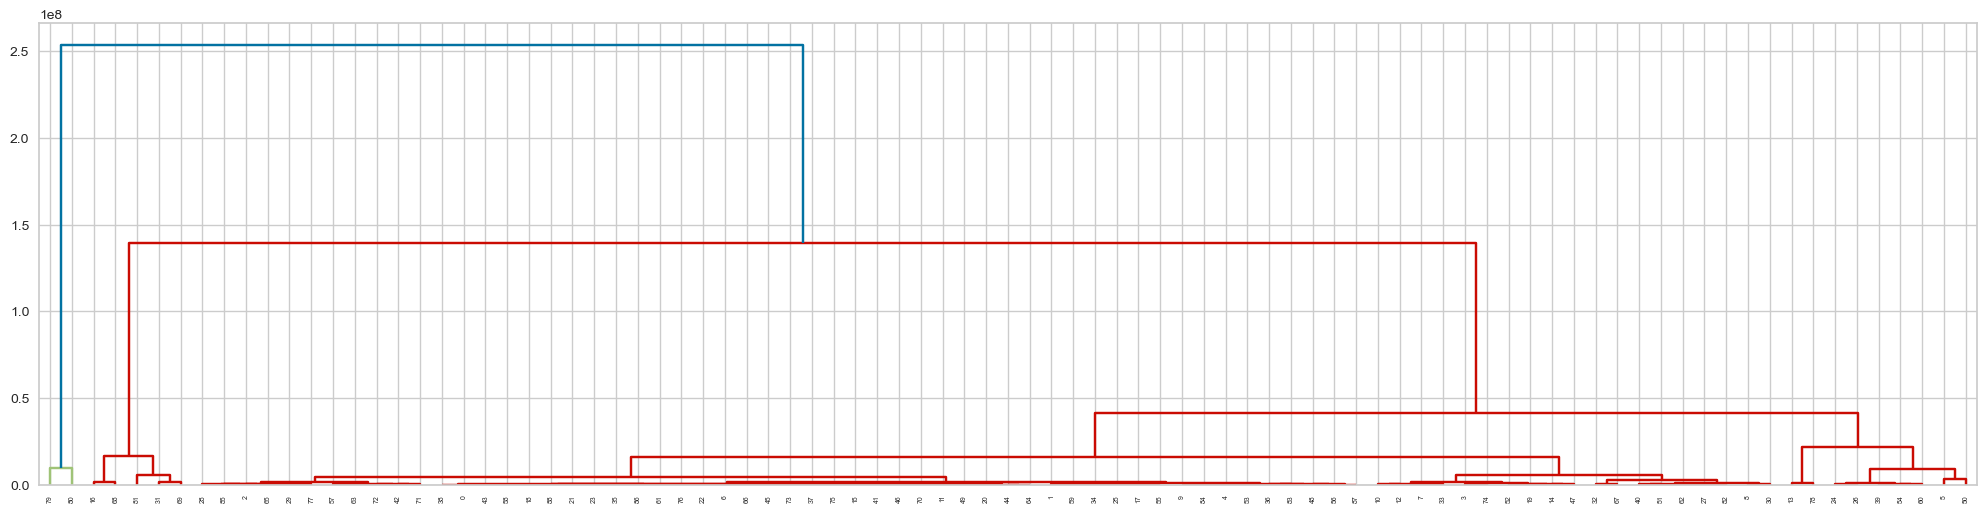

In [57]:
plt.figure(figsize=(25,6))
dendrogram(data);

## Sonuç

Bu projede çeşitli özelliklere göre uçuşlar kümelenmiştir.